In [1]:
import os
def get_dir(dir):
    p = []
    for root, dirs, files in os.walk(dir, topdown=False):
        for name in files:
                if name != '.DS_Store':
                    if not ('ipynb' in name):
                        p.append(os.path.join(root, name))
    return p

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport as pp

In [3]:
state = get_dir('./Datathon Final dataset/state election 2074/')

In [4]:
state

['./Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/२/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/२/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/नवलपरासी (बर्दघाट सुस्ता पूर्व)/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/२/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/२/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/स्याङ्जा/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/मुस्तांग/१/क.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/मुस्तांग/१/ख.csv',
 './Datathon Final dataset/state election 2074/गण्डकी प्रदेश/कास्की/३/क.csv',
 './Datathon Final dataset/sta

In [5]:
df = pd.concat(map(pd.read_csv, state), ignore_index=True)


In [6]:
df.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank
0,2339,4,विष्णु प्रसाद लामिछाने,पुरुष,46,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,19222.0,Elected,1.0
1,2340,4,वाल कृष्ण गैरे,पुरुष,56,नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र),नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,18161.0,NaN,2.0
2,2341,4,विष्‍णु प्रसाद बोटे,पुरुष,26,जनसमाजवादी पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,886.0,NaN,3.0
3,2342,4,भोज बहादुर चौधरी,पुरुष,41,नयाँ शक्ति पार्टी नेपाल,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,397.0,NaN,4.0
4,2343,4,गिर बहादुर महतारा,पुरुष,59,राष्ट्रिय जनमोर्चा,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,216.0,NaN,5.0


In [8]:
df.shape

(252, 12)

Observation: 252 rows and 12 columns

In [9]:
for i in df.columns:
    print(i)

SerialNo
StateID
CandidateName
Gender
Age
PoliticalPartyName
DistrictName
CenterConstID
SCConstID
TotalVotesReceived
EStatus
Rank


In [10]:
# Checking Null Values

In [11]:
df.isnull().sum()

SerialNo                3
StateID                 3
CandidateName           0
Gender                  1
Age                     4
PoliticalPartyName      1
DistrictName            3
CenterConstID           3
SCConstID               1
TotalVotesReceived      2
EStatus               214
Rank                    8
dtype: int64

# High Outliers lies on 'ESTatus Column'

In [12]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]


In [13]:
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4))

SerialNo 0.0119
StateID 0.0119
Gender 0.004
Age 0.0159
PoliticalPartyName 0.004
DistrictName 0.0119
CenterConstID 0.0119
SCConstID 0.004
TotalVotesReceived 0.0079
EStatus 0.8492
Rank 0.0317


In [14]:
for feature in df.columns:
    print(df, df[feature].unique(), len(df[feature].unique()))
    print('----------------------------------------------')

    SerialNo StateID           CandidateName Gender Age  \
0       2339       4  विष्णु प्रसाद लामिछाने  पुरुष  46   
1       2340       4          वाल कृष्ण गैरे  पुरुष  56   
2       2341       4     विष्‍णु प्रसाद बोटे  पुरुष  26   
3       2342       4        भोज बहादुर चौधरी  पुरुष  41   
4       2343       4       गिर बहादुर महतारा  पुरुष  59   
..       ...     ...                     ...    ...  ..   
247     2091       4        गोमा देवी कार्की  महिला  33   
248     2092       4         हरी बहादुर राना  पुरुष  55   
249     2093       4          राम शरण वस्नेत  पुरुष  55   
250     2094       4         राजेन्द्र बजगाई  पुरुष  44   
251     2095       4            प्रसाद गुरुङ  पुरुष  46   

                            PoliticalPartyName  \
0                              नेपाली काँग्रेस   
1    नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)   
2                      जनसमाजवादी पार्टी नेपाल   
3                      नयाँ शक्ति पार्टी नेपाल   
4                           राष्ट्रिय जनम

In [25]:
df['PoliticalPartyName'].value_counts().sort_values(ascending=False)

नेपाली काँग्रेस                                     36
नयाँ शक्ति पार्टी नेपाल                             25
राष्ट्रिय जनमोर्चा                                  21
संघीय समाजवादी फोरम नेपाल                           20
राष्ट्रिय प्रजातन्त्र पार्टी                        18
नेपाल कम्युनिष्ट पार्टी (एमाले)                     18
राष्ट्रिय जनमुक्ति पार्टी                           17
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)           16
मंगोल नेशनल अर्गनाइजेसन                             16
स्वतन्त्र                                           11
विवेकशील साझा पार्टी                                 9
राष्ट्रिय प्रजातन्त्र पार्टी (प्रजातान्त्रिक)        9
देशभक्त जनगणतान्त्रिक मोर्चा नेपाल                   7
नेपाल दलित पार्टी                                    5
जनसमाजवादी पार्टी नेपाल                              4
नेपाल कम्युनिष्ट पार्टी (माले)                       4
आमूल परिवर्तन मसिहा पार्टी नेपाल                     4
एकीकृत राष्ट्रिय प्रजातन्त्र पार्टी(राष्ट्रवादी)     4
राष्ट्रिय 

Observation: One variable is wrong

So many redundant exist.

In [24]:
redundant_party = ['?','wrc दल',' WRC',' WRC Sangathan']
for i in redundant_party:
    index_names = df[ df['PoliticalPartyName'] == i ].index
    df.drop(index_names, inplace = True)
    

In [26]:
elected_dataset = df[df['EStatus']=='Elected']
elected_dataset.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank
0,2339,4,विष्णु प्रसाद लामिछाने,पुरुष,46,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,19222.0,Elected,1.0
11,2350,4,जनक लाल श्रेक्ष्‍ठ,पुरुष,67,नेपाल कम्युनिष्ट पार्टी (एमाले),नवलपरासी (बर्दघाट सुस्ता पूर्व),2,2,19376.0,Elected,1.0
22,2319,4,कृष्णचन्द्र नेपाली पोख्रेल,पुरुष,66,नेपाली काँग्रेस,नवलपरासी (बर्दघाट सुस्ता पूर्व),1,1,17683.0,Elected,1.0
32,2329,4,रोशन बहादुर गाहा थापा,पुरुष,54,नेपाल कम्युनिष्ट पार्टी (एमाले),नवलपरासी (बर्दघाट सुस्ता पूर्व),1,2,20790.0,Elected,1.0
42,2230,4,मोहन प्रसाद रेग्मी,पुरुष,58.0,नेपाल कम्युनिष्ट पार्टी (एमाले),स्याङ्जा,2,1,16613.0,Elected,1.0


In [27]:
elected_dataset["PoliticalPartyName"].value_counts()

नेपाल कम्युनिष्ट पार्टी (एमाले)              16
नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र)    10
नेपाली काँग्रेस                               6
राष्ट्रिय जनमोर्चा                            2
स्वतन्त्र                                     1
नयाँ शक्ति पार्टी नेपाल                       1
Name: PoliticalPartyName, dtype: int64

<AxesSubplot:xlabel='PoliticalPartyName', ylabel='count'>

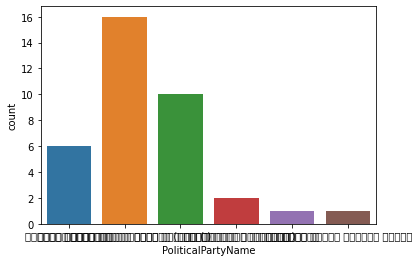

In [28]:
sns.countplot(elected_dataset['PoliticalPartyName'])

In [29]:
# Female-Candidate

In [30]:
female_candidate = df[df['Gender']=='महिला']

In [31]:
female_candidate.head()

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank
10,2349,4,देवका गौतम,महिला,36,स्वतन्त्र,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,1,6.0,NaN,11.0
19,2358,4,अञ्जना डल्लाकोटी,महिला,33,राष्ट्रिय शिवसेना पार्टी,नवलपरासी (बर्दघाट सुस्ता पूर्व),2,2,10.0,NaN,9.0
34,2331,4,पदमाया गाहा मगर,महिला,25,राष्ट्रिय जनमुक्ति पार्टी,नवलपरासी (बर्दघाट सुस्ता पूर्व),1,2,353.0,NaN,3.0
46,2234,4,कृष्ण माया राना,महिला,49.0,राष्ट्रिय जनमुक्ति पार्टी,स्याङ्जा,2,1,123.0,NaN,5.0
47,2235,4,मेनुका सार्की,महिला,39.0,राष्ट्रिय जनमोर्चा,स्याङ्जा,2,1,113.0,NaN,6.0


In [32]:
female_candidate.isnull().sum()

SerialNo               0
StateID                0
CandidateName          0
Gender                 0
Age                    0
PoliticalPartyName     1
DistrictName           0
CenterConstID          0
SCConstID              0
TotalVotesReceived     0
EStatus               22
Rank                   0
dtype: int64

In [33]:
wining_female_candidate = elected_dataset[elected_dataset['Gender']=='महिला']

In [34]:
wining_female_candidate

,SerialNo,StateID,CandidateName,Gender,Age,PoliticalPartyName,DistrictName,CenterConstID,SCConstID,TotalVotesReceived,EStatus,Rank
173,2202,4,आशा कोइराला,महिला,47,नेपाल कम्युनिष्ट पार्टी (माओवादी केन्द्र),तनहुँ,2,1,16646.0,Elected,1.0


Observation: Only one female has won for state election

In [35]:
# Extracting  Numerical Column
numerical_colum = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [36]:
numerical_colum

['TotalVotesReceived', 'Rank']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 251
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SerialNo            244 non-null    object 
 1   StateID             244 non-null    object 
 2   CandidateName       247 non-null    object 
 3   Gender              246 non-null    object 
 4   Age                 243 non-null    object 
 5   PoliticalPartyName  246 non-null    object 
 6   DistrictName        244 non-null    object 
 7   CenterConstID       244 non-null    object 
 8   SCConstID           247 non-null    object 
 9   TotalVotesReceived  247 non-null    float64
 10  EStatus             36 non-null     object 
 11  Rank                241 non-null    float64
dtypes: float64(2), object(10)
memory usage: 25.1+ KB


In [ ]:
whi